In [1]:
using Revise
import Random: seed!

In [2]:
# for anonymous submission
import Logging: global_logger, SimpleLogger, Warn
global_logger(SimpleLogger(stdout, Warn))
nothing

In [3]:
using MAPPFD

# Step-1: Generate an Instance

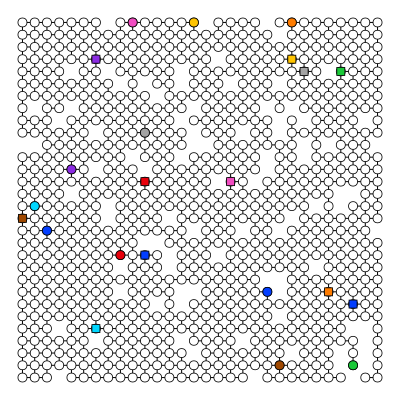

In [4]:
seed!(1)
ins = generate_random_sync_instance_grid_wellformed(
  N_min = 10,
  N_max = 30,
  width = 30,
  height = 30,
  occupancy_rate = 0.1,
  max_num_crashes = 1,
)
plot_instance(ins; markersize = 5, markersize_goal = 4)

# Step-2: Solve

In [5]:
# solve
@time solution = MAPPFD.DCRF(
    ins;
    multi_agent_path_planner = MAPPFD.Solver.RPP,
    VERBOSE = 2,
    time_limit_sec = 10,
)

# verification
seed!(1)
println("verification:", approx_verify_with_local_FD(ins, solution; max_activation = 80, num_repetition = 10, failure_prob = 0.1))
plot_solution(ins, solution; markersize = 6, markersize_goal = 4, δ=0.001)
safe_savefig!("tmp.png")

elapased: 0.976 sec	initial paths are found
elapased: 1.083 sec	initial unresolved events: 7
elapased: 1.083 sec	start resolving events with tie-break: nothing
elapased: 1.9 sec	resolved: 0007	unresolved: 000102
elapased: 1.9 sec	found solution
  2.396231 seconds (6.37 M allocations: 355.238 MiB, 4.02% gc time, 99.52% compilation time)
verification:true


# Step-3: Emulate Execution

 19.824461 seconds (101.40 M allocations: 3.814 GiB, 3.90% gc time, 5.14% compilation time)


Plots.AnimatedGif("/Users/Kei18/Dropbox/work/project/risk-aware/code/notebooks/tmp.gif")
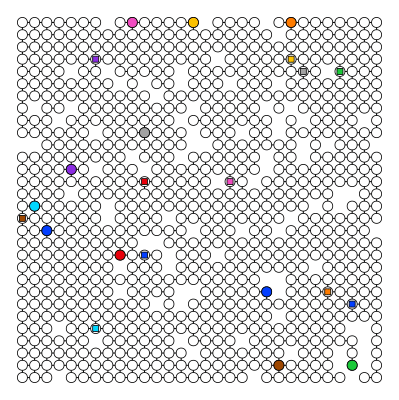

In [6]:
seed!(1)
hist = execute_with_local_FD(ins, solution; max_activation = 80, VERBOSE = 2, scheduled_crashes = [SyncCrash(who=4, loc=370, when=4)])

# requiring ~30s
@time plot_anim(ins, hist; markersize = 6, markersize_goal = 3, interpolate_nums=1)